In [14]:
!pip install cirq --pre

In [15]:
import cirq
import recirq.mbl_dtc as dtc_utils
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# define the qubits we'll be using
qubit_locations = [(3, 9), (3, 8), (3, 7), (4, 7), (4, 8), (5, 8), (5, 7), (5, 6), (6, 6), (6, 5), (7, 5), (8, 5),
              (8, 4), (8, 3), (7, 3), (6, 3)]

qubits = [cirq.GridQubit(*idx) for idx in qubit_locations]
num_qubits = len(qubits)

# prepare our DTC circuit list, with 0 through 100 cycles
num_cycles = 100
circuit_list = dtc_utils.symbolic_dtc_circuit_list(qubits=qubits, cycles=num_cycles)

<timed exec>:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


CPU times: user 2min 57s, sys: 1.84 s, total: 2min 58s
Wall time: 2min 58s


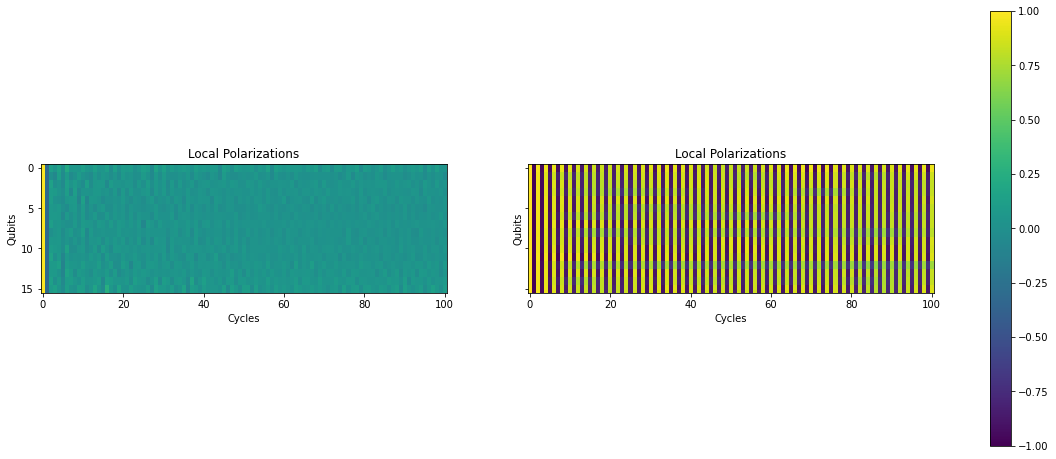

In [17]:
%%time
# Figure 2d

g_options = [0.6, 0.94]
instances = 36

# random initial state
initial_states = np.random.choice(2, (instances, num_qubits))

# random noise (h)
local_fields = np.random.uniform(-1.0, 1.0, (instances, num_qubits))

# parameters for two-qubit FSim gates
# zeros for theta, zeta, chi
thetas = np.zeros((instances, num_qubits))
zetas = np.zeros((instances, num_qubits))
chis = np.zeros((instances, num_qubits))

# random gammas
gammas = -np.random.uniform(0.5*np.pi, 1.5*np.pi, (instances, num_qubits))

# phi dependent on gamma
phis = -2*gammas

# prepare subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), sharey=True, sharex=True)

# evaluate and yield probabilities and their associated initial states for each of the input options for thermalization (g)
for g, axis in zip(g_options, axes):
    # expand g for all disorder instances
    gs = [g]*instances 

    # prepare parameter resolvers
    param_resolvers = dtc_utils.dtc_param_resolver_sweep(gs, initial_states, local_fields, thetas, zetas, chis, gammas, phis)

    # simulate and collect probabilities
    probabilities = np.asarray(list(dtc_utils.simulate_dtc_circuit_list_sweep(circuit_list, param_resolvers, qubits)))

    # turn probabilities into polarizations, relative to initial_state
    polarizations = dtc_utils.get_polarizations(probabilities, num_qubits, cycles_axis=1, probabilities_axis=2, initial_states=initial_states)

    # average over all disorder instances
    average_polarizations = np.mean(polarizations, axis=0)

    # plot polarizations as an image
    artist = axis.imshow(average_polarizations.T, aspect = 2.0, vmin=-1.0, vmax=1.0)

    # add labels and colorbar and title
    axis.set_xlabel('Cycles')
    axis.set_ylabel('Qubits')
    axis.set_title('Local Polarizations')
    
# add colorbar and show
fig.colorbar(artist, ax=axes.ravel().tolist())
fig.show()
